<a href="https://colab.research.google.com/github/YangxuanWu/Python/blob/master/Python/YangxuanWu_SimpleRNN_mathod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.layers import SimpleRNN

In [ ]:
#SimpleRNN处理批序列，就像所有其他Keras层一样，而不是像Numpy示例中那样只处理单个序列。这意味着它接受形状的输入(batch_size、时间步长、input_features)，而不是(时间步长、input_features)。像所有的周期性层Keras SimpleRNN可以运行在两种不同的模式:也可以返回的全部序列连续输出为每个步伐(3 d形状张量(batch_size,步伐,output_features)),也可以只返回最后输出为每个输入序列(2 d形状张量(batch_size output_features))。
#这两种模式由return_sequences构造函数参数控制

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [9]:
#train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6720 - acc: 0.5770 - val_loss: 0.5394 - val_acc: 0.7316
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4303 - acc: 0.8080 - val_loss: 0.4098 - val_acc: 0.8210
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2911 - acc: 0.8832 - val_loss: 0.4147 - val_acc: 0.8248
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2280 - acc: 0.9120 - val_loss: 0.4372 - val_acc: 0.8060
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1546 - acc: 0.9436 - val_loss: 0.4472 - val_acc: 0.8174
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0981 - acc: 0.9670 - val_loss: 0.5353 - val_acc: 0.8202
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0607 - acc: 0.9810 - val_loss: 0.5483 - val_acc:

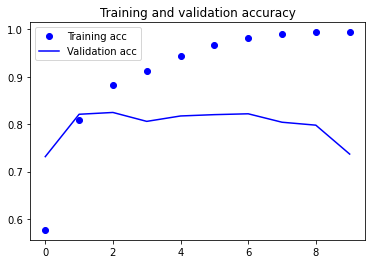

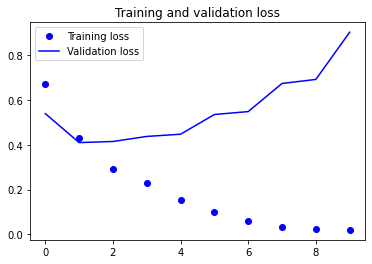

In [10]:
#display the training and validation loss and accuracy:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
#Keras中的一个具体的LSTM示例
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5264 - acc: 0.7609 - val_loss: 0.3950 - val_acc: 0.8450
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3069 - acc: 0.8822 - val_loss: 0.3224 - val_acc: 0.8676
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2417 - acc: 0.9075 - val_loss: 0.5143 - val_acc: 0.7972
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2065 - acc: 0.9238 - val_loss: 0.3583 - val_acc: 0.8746
Epoch 5/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1812 - acc: 0.9331 - val_loss: 0.3945 - val_acc: 0.8728
Epoch 6/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1607 - acc: 0.9416 - val_loss: 0.3624 - val_acc: 0.8550
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1451 - acc: 0.9473 - val_loss: 0.3237 - val_acc:

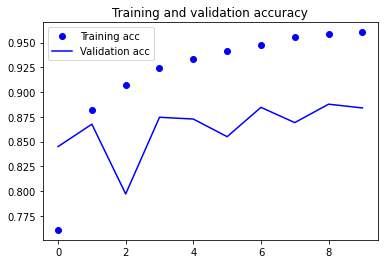

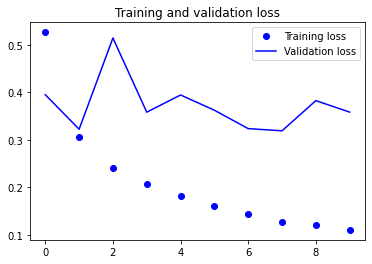

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
import keras
keras.__version__

'2.3.1'

In [15]:
#create_char_rnn_model
def create_char_rnn_model(self, emb_dim, word_maxlen, vocab_char_size,
                              char_maxlen):
        from keras.layers import SimpleRNN
        logger.info('Building character RNN model')
        input_char = Input(shape=(char_maxlen, ), name='input_char')
        char_emb = Embedding(
            vocab_char_size, emb_dim, mask_zero=True)(input_char)
        rnn = SimpleRNN(
            300,
            return_sequences=True,
            dropout=self.dropout,
            recurrent_dropout=self.recurrent_dropout)(char_emb)
        dropped = Dropout(0.5)(rnn)
        mot = MeanOverTime(mask_zero=True)(dropped)
        densed = Dense(self.num_outputs, name='dense')(mot)
        output = Activation('sigmoid')(densed)
        model = Model(inputs=input_char, outputs=output)
        model.get_layer('dense').bias.set_value(self.bias)
        logger.info('  Done')
        return model 

In [16]:
#test_initial_state_SimpleRNN
def test_initial_state_SimpleRNN(self):
        data = np.random.rand(1, 1, 2)
        model = keras.models.Sequential()
        model.add(keras.layers.SimpleRNN(5, input_shape=(1, 2), batch_input_shape=[1, 1, 2], stateful=True))
        model.get_layer(index=1).reset_states()
        coreml_model = keras_converter.convert(model=model, input_names='data', output_names='output')
        keras_output_1 = model.predict(data)
        coreml_full_output_1 = coreml_model.predict({'data': data})
        coreml_output_1 = coreml_full_output_1['output']
        coreml_output_1 = np.expand_dims(coreml_output_1, 1)
        np.testing.assert_array_almost_equal(coreml_output_1.T, keras_output_1)

        hidden_state = np.random.rand(1, 5)
        model.get_layer(index=1).reset_states(states=hidden_state)
        coreml_model = keras_converter.convert(model=model, input_names='data', output_names='output')
        spec = coreml_model.get_spec()
        keras_output_2 = model.predict(data)
        coreml_full_output_2 = coreml_model.predict({'data': data, spec.description.input[1].name: hidden_state[0]})
        coreml_output_2 = coreml_full_output_2['output']
        coreml_output_2 = np.expand_dims(coreml_output_2, 1)
        np.testing.assert_array_almost_equal(coreml_output_2.T, keras_output_2)

In [17]:
#test_rnn_seq
def test_rnn_seq(self):
        np.random.seed(1988)
        input_dim = 11
        input_length = 5

        # Define a model
        model = Sequential()
        model.add(SimpleRNN(20, input_shape=(input_length, input_dim), return_sequences=False))

        # Set some random weights
        model.set_weights([np.random.rand(*w.shape)*0.2 - 0.1 for w in model.get_weights()])

        # Test the keras model
        self._test_keras_model(model, input_blob = 'data', output_blob = 'output') 

In [18]:
#setup
def setUp(self):
        super(TestRNNEncoderWithSimpleRNNClass, self).setUp()
        self.model = self.create_model(SimpleRNN) 